Imports

In [1]:
from parameters_U235_pump_transient import *
import numpy as np
import matplotlib.pyplot as plt
from jitcdde import t
from msrDynamics import Node, System


In [2]:
MSRE = System()

# radiator
T_out_rc = Node(m = mn_rp, scp = mcp_rpn/mn_rp, W = W_rp, y0 = T0_rp)
T_out_air = Node(m = mn_rs, scp = mcp_rsn/mn_rs, W = W_rs, y0 = T0_rs)

# heat exchanger
T_hf1 = Node(m = mn_p, scp = mcp_pn/mn_p, W = W_p, y0 = T0_p1)
T_hf2 = Node(m = mn_p, scp = mcp_pn/mn_p, W = W_p, y0 = T0_p2)
T_hf3 = Node(m = mn_p, scp = mcp_pn/mn_p, W = W_p, y0 = T0_p3)
T_hf4 = Node(m = mn_p, scp = mcp_pn/mn_p, W = W_p, y0 = T0_p4)
T_ht1 = Node(m = m_tn, scp = scp_t, y0 = T0_t1)
T_ht2 = Node(m = m_tn, scp = scp_t, y0 = T0_t2)
T_hc1 = Node(m = mn_s, scp = mcp_sn/mn_s, W = W_s, y0 = T0_s1)
T_hc2 = Node(m = mn_s, scp = mcp_sn/mn_s, W = W_s, y0 = T0_s2)
T_hc3 = Node(m = mn_s, scp = mcp_sn/mn_s, W = W_s, y0 = T0_s3)
T_hc4 = Node(m = mn_s, scp = mcp_sn/mn_s, W = W_s, y0 = T0_s4)

# core 
n = Node(y0 = n_frac0)
C1 = Node(y0 = C0[0])
C2 = Node(y0 = C0[1])
C3 = Node(y0 = C0[2])
C4 = Node(y0 = C0[3])
C5 = Node(y0 = C0[4])
C6 = Node(y0 = C0[5])
rho = Node(y0 = rho_0)

T_cg = Node(m = mcp_g1/scp_g, scp = scp_g, y0 = T0_g1)
T_cf1 = Node(m = mn_f, scp = scp_f, W = W_f, y0 = T0_f1)
T_cf2 = Node(m = mn_f, scp = scp_f, W = W_f, y0 = T0_f1)

MSRE.add_nodes([T_out_rc,T_out_air,T_hf1,T_hf2,T_hf3,T_hf4,T_ht1,T_ht2,T_hc1,
               T_hc2,T_hc3,T_hc4,n,C1,C2,C3,C4,C5,C6,T_cg,T_cf1,T_cf2,rho])


# dynamics 

# radiator
T_out_rc.set_dTdt_advective(source = T_hc4.y(t-tau_hx_r))
T_out_rc.set_dTdt_convective(source = [T_out_air.y()], hA = [hA_rpn])

T_out_air.set_dTdt_advective(source = Trs_in)
T_out_air.set_dTdt_convective(source = [T_out_rc.y()], hA = [hA_rsn])

# heat exchanger
T_hf1.set_dTdt_advective(source = T_cf2.y(t-tau_c_hx))
T_hf1.set_dTdt_convective(source = [T_ht1.y()], hA = [hA_pn])

T_hf2.set_dTdt_advective(source = T_hf1.y())
T_hf2.dTdt_convective = T_hf1.dTdt_convective

T_hf3.set_dTdt_advective(source = T_hf2.y())
T_hf3.set_dTdt_convective(source = [T_ht2.y()], hA = [hA_pn])

T_hf4.set_dTdt_advective(source = T_hf3.y())
# T_hf4.set_dTdt_convective(source = [T_ht2.y()], hA = [hA_pn])
T_hf4.dTdt_convective = T_hf3.dTdt_convective

# T_ht1.set_dTdt_convective(source = [T_hf1.y(),T_hf2.y(),T_hc3.y(),T_hc4.y()], hA = [hA_pn,hA_pn,hA_sn,hA_sn])
# T_ht2.set_dTdt_convective(source = [T_hf3.y(),T_hf4.y(),T_hc1.y(),T_hc2.y()], hA = [hA_pn,hA_pn,hA_sn,hA_sn])
T_ht1.set_dTdt_convective(source = [T_hf1.y(),T_hf1.y(),T_hc3.y(),T_hc3.y()], hA = [hA_pn,hA_pn,hA_sn,hA_sn])
T_ht2.set_dTdt_convective(source = [T_hf3.y(),T_hf3.y(),T_hc1.y(),T_hc1.y()], hA = [hA_pn,hA_pn,hA_sn,hA_sn])

T_hc1.set_dTdt_advective(source = T_out_rc.y(t-tau_r_hx))
T_hc1.set_dTdt_convective(source = [T_ht2.y()], hA = [hA_sn])

T_hc2.set_dTdt_advective(source = T_hc1.y())
T_hc2.dTdt_convective = T_hc1.dTdt_convective

T_hc3.set_dTdt_advective(source = T_hc2.y())
T_hc3.set_dTdt_convective(source = [T_ht1.y()], hA = [hA_sn])

T_hc4.set_dTdt_advective(source = T_hc3.y())
T_hc4.dTdt_convective = T_hc3.dTdt_convective

# core
n.set_dndt(r = rho.y(), beta_eff = beta_t, Lambda = Lam, lam = lam, C = [C1.y(),C2.y(),C3.y(),C4.y(),C5.y(),C6.y()])
C1.set_dcdt(n.y(),beta = beta[0],Lambda = Lam,lam = lam[0],t_c=tau_c,t_l = tau_l, flow = True)
C2.set_dcdt(n.y(), beta = beta[1],Lambda = Lam,lam = lam[1],t_c=tau_c,t_l = tau_l, flow = True)
C3.set_dcdt(n.y(),beta = beta[2],Lambda = Lam,lam = lam[2],t_c=tau_c,t_l = tau_l, flow = True)
C4.set_dcdt(n.y(),beta = beta[3],Lambda = Lam,lam = lam[3],t_c=tau_c,t_l = tau_l, flow = True)
C5.set_dcdt(n.y(),beta = beta[4],Lambda = Lam,lam = lam[4],t_c=tau_c,t_l = tau_l, flow = True)
C6.set_dcdt(n.y(),beta = beta[5],Lambda = Lam,lam = lam[5],t_c=tau_c,t_l = tau_l, flow = True)

T_cg.set_dTdt_convective(source = [T_cf1.y()], hA = [hA_fg])
T_cg.set_dTdt_internal(source = [n.y()], k = [k_g*P])

T_cf1.set_dTdt_advective(source = T_hf4.y(t-tau_hx_c))
T_cf1.set_dTdt_convective(source = [T_cg.y()], hA = [k_1*hA_fg])
T_cf1.set_dTdt_internal(source = [n.y()], k = [k_f1*P])

T_cf2.set_dTdt_advective(source = T_cf1.y())
T_cf2.dTdt_convective = T_cf1.dTdt_convective
T_cf2.set_dTdt_internal(source = [n.y()], k = [k_f2*P])

rho.set_drdt(sources = [T_cf1.dydt, T_cg.dydt], coeffs = [a_f/2,a_g])

In [3]:
sol_jit = MSRE.solve(T, max_delay = 30.0, abs_tol = 1e-14, rel_tol = 1e-12, populate_nodes = True)

# T, sol_jit = MSRE.equilibrium_search(dT = 0.01, 
#                                      max_delay = tau_l, 
#                                      populate_nodes = False, 
#                                      md_step = 0.0001, 
#                                      abs_tol_eq = 1.0e-12, 
#                                      rel_tol_eq = 1.0e-10,
#                                      show_conv_metrics = True)

finalizing integrator...
integrating...


Integration progress:   0%|          | 0/500000 [00:00<?, ?it/s]

Generating, compiling, and loading C code.


Integration progress:   0%|          | 1/500000 [00:00<111:03:32,  1.25it/s]/home/luke/miniconda3/envs/onion_dynamics_py312/lib/python3.12/site-packages/jitcdde/_jitcdde.py:820: UserWarning: The target time is smaller than the current time. No integration step will happen. The returned state will be extrapolated from the interpolating Hermite polynomial for the last integration step. You may see this because you try to integrate backwards in time, in which case you did something wrong. You may see this just because your sampling step is small, in which case there is no need to worry (though you should think about increasing your sampling time).
  warn("The target time is smaller than the current time. No integration step will happen. The returned state will be extrapolated from the interpolating Hermite polynomial for the last integration step. You may see this because you try to integrate backwards in time, in which case you did something wrong. You may see this just because your samp

populating nodes objects solution vectors...


In [4]:
# fig, axs = plt.subplots(3,2, figsize = (8,8))

# axs[0,0].set_xlim([0,20])
# axs[0,0].plot(T, T_hf4.y_out, label = 'core inlet')
# axs[0,0].plot(T, T_cf2.y_out, label = 'core outlet')
# axs[0,0].plot(T, T_cg.y_out, label = 'graphite')
# axs[0,0].set_ylim([647,649])
# axs[0,0].legend()

# axs[1,0].set_xlim([0,20])
# axs[1,0].plot(T, T_cf2.y_out, label = 'hx fuel inlet')
# axs[1,0].plot(T, T_hf4.y_out, label = 'hx fuel outlet')
# axs[1,0].plot(T, (T_ht1.y_out+T_ht1.y_out)/2, label = 'hx tubes')
# axs[1,0].legend()

# axs[2,0].set_xlim([0,20])
# axs[2,0].plot(T, T_out_rc.y_out, label = 'hx coolant inlet')
# axs[2,0].plot(T, T_hc4.y_out, label = 'hx coolant outlet')
# axs[2,0].plot(T, (T_ht1.y_out+T_ht1.y_out)/2, label = 'hx tubes')
# axs[2,0].legend()

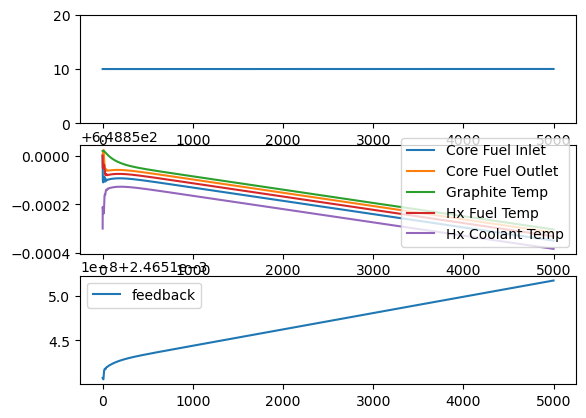

In [5]:
fig, axs = plt.subplots(3,1)

axs[0].set_ylim([0,20])
# axs[0].set_xlim([0,100])
axs[0].plot(T, P*n.y_out*(1e6), label = 'Power (W)')

# axs[1].set_ylim([600,700])
# axs[1].set_xlim([0,100])
axs[1].plot(T, T_hf4.y_out, label = 'Core Fuel Inlet')
axs[1].plot(T, T_cf2.y_out, label = 'Core Fuel Outlet')
axs[1].plot(T, T_cg.y_out, label = 'Graphite Temp')
axs[1].plot(T, T_hf2.y_out, label = 'Hx Fuel Temp')
axs[1].plot(T, T_hc2.y_out, label = 'Hx Coolant Temp')
axs[1].legend()

axs[2].plot(T, rho.y_out, label = 'feedback')
axs[2].legend()

In [6]:
# fig,axs = plt.subplots(2,3,figsize=(18,12))

# # Set a professional color scheme
# colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

# # Function to update the style of each axis
# def update_axis_style(ax, title, x_label='', y_label='', x_ticks=True):
#     ax.set_xlim([t0,tf])
#     ax.set_title(title)
#     ax.set_xlabel(x_label)
#     ax.set_ylabel(y_label)
#     ax.grid(True, which='both', linestyle='--', linewidth=0.5)
#     ax.tick_params(axis='x', which='both', bottom=x_ticks, top=False, labelbottom=x_ticks)
#     ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True)

# # Applying the updated style to the subplots
# # Fuel temperatures
# sol_jit = np.array(sol_jit)
# update_axis_style(axs[0, 0], "Fuel Node Temperatures (C)", y_label=r"$^\circ$ C")
# axs[0,0].plot(T,[s[20] for s in sol_jit],label="core 1",color=colors[0]) 
# axs[0,0].plot(T,[s[21] for s in sol_jit],label="core 2",color=colors[1]) 
# axs[0,0].plot(T,[s[2] for s in sol_jit],label="hx 1",color=colors[2])  
# axs[0,0].plot(T,[s[3] for s in sol_jit],label="hx 2",color=colors[3])
# axs[0,0].plot(T,[s[4] for s in sol_jit],label="hx 3",color=colors[4])
# axs[0,0].plot(T,[s[5] for s in sol_jit],label="hx 4",color=colors[5]) 

# # Coolant temperatures
# update_axis_style(axs[0, 1], "Coolant Node Temperatures (C)", y_label=r"$^\circ$ C")
# axs[0, 1].plot(T, sol_jit[:, 6], label=f"hx 1", color=colors[0])
# axs[0, 1].plot(T, sol_jit[:, 7], label=f"hx 1", color=colors[1])
# axs[0, 1].plot(T, sol_jit[:, 8], label=f"hx 1", color=colors[2])
# axs[0, 1].plot(T, sol_jit[:, 9], label=f"hx 1", color=colors[3])
# axs[0, 1].plot(T, sol_jit[:, 0], label=f"r 1", color=colors[4])

# # Tube node temperatures
# update_axis_style(axs[0, 2], "Tube Node Temperatures (C)", y_label=r"$^\circ$ C")
# axs[0,2].plot(T,[s[6] for s in sol_jit],label="hx 1",color=colors[0]) 
# axs[0,2].plot(T,[s[7] for s in sol_jit],label="hx 2",color=colors[1]) 

# # Precursor concentrations
# update_axis_style(axs[1, 2], "Precursor Concentrations", x_label="t (s)", y_label=r"concentration (1/cm$^3$)")
# for i in range(6):
#     axs[1, 2].plot(T, sol_jit[:, i+13], label=f"C{i+1}", color=colors[i])
# axs[1, 2].set_yscale("log")

# # Multiplication factor temp
# update_axis_style(axs[1, 0], r"$n$", x_label="t (s)", y_label=r"$\frac{n}{n_0}$")
# axs[1, 0].plot(T, sol_jit[:, 12], label="n", color='tab:blue')

# # Reactivity
# update_axis_style(axs[1, 1], r"$\rho$", x_label="t (s)")
# axs[1, 1].plot(T, sol_jit[:, 22], label="n", color='tab:orange')

# # Adding legends
# for ax in axs.flat:
#     ax.legend()

# plt.tight_layout()
# plt.show()
